<a href="https://colab.research.google.com/github/lacouth/metodos_numericos/blob/master/02_sistemas_lineares/SistemasLineares_introducao_apresentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos Numéricos

## Interpolação - polinômios de Newton

### Patric Lacouth

# Polinômios de Newton

* fácil de implementar
* diferenças divididas
* polinômio final precisa de simplificação

# o polinômio de Newton


$$P_3(x) = f[x_0] + f[x_1,x_0](x-x_0) + f[x_2,x_1,x_0](x-x_0)(x-x_1) + f[x_3,x_2,x_1,x_0](x-x_0)(x-x_1)(x-x_2) \ldots$$


$$P_3(x) = f[x_0] + f[x_1,x_0](x-x_0) + f[x_2,x_1,x_0](x-x_0)(x-x_1) + f[x_3,x_2,x_1,x_0](x-x_0)(x-x_1)(x-x_2)$$


$$ \left.\begin{matrix}
f[x_0] &  &  &  &  & = & y_0 \\ 
f[x_0] & + & f[x_1,x_0](x_1 - x_0) &  &  & = & y_1 \\ 
f[x_0] & + & f[x_1,x_0](x_2 - x_0) & + & f[x_2,x_1,x_0](x_2 - x_1)(x_2 - x_0) & = & y_2 
\end{matrix}\right.$$

## as diferenças divididas - ordem 0
$$\left.\begin{matrix}
f[x_0] & = & y_0 \\ 
f[x_1] & = & y_1 \\ 
f[x_2] & = & y_2 \\ 
\end{matrix}\right.$$

## as diferenças divididas - ordem 1
$$\left.\begin{matrix}
f[x_1,x_0] & =  & \frac{y_1 - y_0}{x_1 - x_0}  \\ 
f[x_2,x_1] & =  & \frac{y_2 - y_1}{x_2 - x_1}  \\
f[x_3,x_2] & =  & \frac{y_3 - y_2}{x_3 - x_2}  \\ 
\end{matrix}\right.$$

## as diferenças divididas - ordem 2
$$\left.\begin{matrix}
f[x_2,x_1,x_0] &  = & \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2 - x_0}\\
f[x_3,x_2,x_1] &  = & \frac{f[x_3,x_2] - f[x_2,x_1]}{x_3 - x_1}\\
f[x_4,x_3,x_2] &  = & \frac{f[x_4,x_3] - f[x_3,x_2]}{x_4 - x_2}\\
\end{matrix}\right.$$

Observe que as equações as diferenças divididas são recursivas - isto é, diferenças de ordem mais alta são calculadas tomando-se diferenças das diferenças de ordem mais baixa, a figura abaixo apresenta uma tabela de diferenças divididas.

<img  src = "imagens/diferencas_divididas.png" style = "display:block; margin-left:auto; margin-right:auto;"/>

### Exemplo interpolação quadrática

Dado os pares (x,y), determine P(4):

x | y
---|---
3|40
5|82
9|214

Usando a fórmula de Newton para interpolação quadrática:

$$P_2(x) = f[x_0] + f[x_1,x_0](x-x_0) + f[x_2,x_1,x_0](x - x_0)(x - x_1)$$

onde

$$f[x_1,x_0] = \frac{y_1 - y_0}{x_1 - x_0} = \frac{82-40}{5-3} = 21$$



$$f[x_2,x_1,x_0] = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2-x_0} = \frac{\frac{214 - 82}{9 - 5} - \frac{82-40}{5-3}}{9-3} = 2$$

substituindo na equação original:

$$P_2(x) = 40 + (x-3)21 + (x-3)(x-5)2$$

obtemos:

$P_2(x) = 7 + 5x + 2x^2$

$P_2(4) = 59$

# Implementando em Python
## importando as bibliotecas

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

## criando os pontos x,y

x | y
---|---
3|40
5|82
9|214

In [2]:
xi = np.array([3,5,9], dtype = float)
yi = np.array([40,82,214], dtype = float)

## criando o símbolo x

In [3]:
x = sympy.Symbol('x')
x

x

## criando um função para calcular as diferenças divididas

$$f[x_2,x_1,x_0] = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2 - x_0} $$

In [4]:
def dd(x,y):
    if len(x) == 1:
        return y[0]
    else:
        return (dd(x[1:],y[1:]) - dd(x[:-1], y[:-1])) / (x[-1] - x[0])

## Criando o polinômio
$$P_2(x) = f[x_0] + f[x_1,x_0](x-x_0) + f[x_2,x_1,x_0](x - x_0)(x - x_1)$$

In [5]:
Px = yi[0] + dd(xi[0:2],yi[0:2]) * (x - xi[0]) + dd(xi,yi) * (x - xi[0]) * (x - xi[1])
Px

21.0*x + (x - 5.0)*(2.0*x - 6.0) - 23.0

## simplificando o P(X)

In [6]:
Px = sympy.simplify(Px)
Px

2.0*x**2 + 5.0*x + 7.0

## criando uma função para o polinômio

In [7]:
Px

2.0*x**2 + 5.0*x + 7.0

In [8]:
def polinomio(x):
    return 2.0 * x ** 2 + 5.0 * x + 7.0

## traçando o gráfico do polinômio

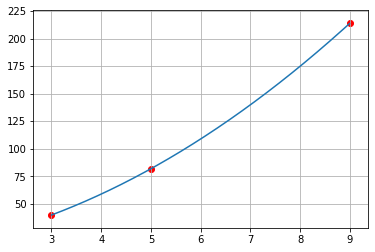

In [9]:
xa = np.arange(3,9,0.01)
ya = polinomio(xa)

plt.plot(xa,ya)
plt.scatter(xi,yi, c='red')

plt.grid(True)

# now, go code!